<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/Fashion_Mnist_Misclassified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
!git clone https://github.com/bhargav23/CNN-Projects

fatal: destination path 'CNN-Projects' already exists and is not an empty directory.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [5]:
import evadataloader
dataloader = evadataloader.DataLoader()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.




torch.Size([512, 1, 28, 28])
torch.Size([512])


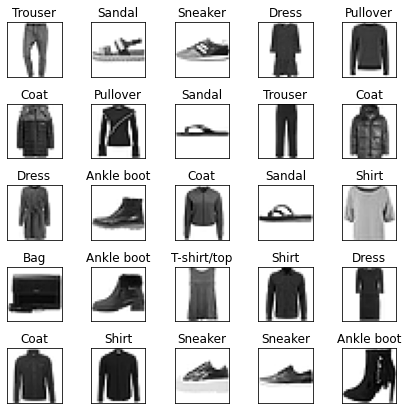

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [7]:
import fminstModels

net = fminstModels.Net()

In [8]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
       BatchNorm2d-3           [-1, 32, 28, 28]              64
           Dropout-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 32, 28, 28]           9,248
              ReLU-6           [-1, 32, 28, 28]               0
       BatchNorm2d-7           [-1, 32, 28, 28]              64
           Dropout-8           [-1, 32, 28, 28]               0
            Conv2d-9           [-1, 32, 28, 28]           9,248
             ReLU-10           [-1, 32, 28, 28]               0
      BatchNorm2d-11           [-1, 32, 28, 28]              64
          Dropout-12           [-1, 32, 28, 28]               0
        MaxPool2d-13           [-1, 32, 14, 14]               0
           Conv2d-14           [-1

In [10]:
model

Net(
  (convblock1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.07, inplace=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.07, inplace=False)
  )
  (convblock3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.07, inplace=False)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (convblock4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05,

In [11]:
import evascheduler

In [12]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.40112677216529846 Batch_id=117 Accuracy=77.72: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.3344, Accuracy: 6656/10000 (66.56%)

EPOCH: 1


Loss=0.3743164837360382 Batch_id=117 Accuracy=87.60: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1335, Accuracy: 8665/10000 (86.65%)

EPOCH: 2


Loss=0.16737449169158936 Batch_id=117 Accuracy=89.87: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1238, Accuracy: 8762/10000 (87.62%)

EPOCH: 3


Loss=0.23320025205612183 Batch_id=117 Accuracy=90.84: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1040, Accuracy: 8960/10000 (89.60%)

EPOCH: 4


Loss=0.1390818953514099 Batch_id=117 Accuracy=91.85: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0961, Accuracy: 9039/10000 (90.39%)

EPOCH: 5


Loss=0.15911173820495605 Batch_id=117 Accuracy=92.28: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1008, Accuracy: 8992/10000 (89.92%)

EPOCH: 6


Loss=0.21053503453731537 Batch_id=117 Accuracy=93.41: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0871, Accuracy: 9129/10000 (91.29%)

EPOCH: 7


Loss=0.15479394793510437 Batch_id=117 Accuracy=93.71: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0840, Accuracy: 9160/10000 (91.60%)

EPOCH: 8


Loss=0.157876119017601 Batch_id=117 Accuracy=93.84: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0869, Accuracy: 9131/10000 (91.31%)

EPOCH: 9


Loss=0.18702851235866547 Batch_id=117 Accuracy=93.87: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0891, Accuracy: 9109/10000 (91.09%)

EPOCH: 10


Loss=0.2087317705154419 Batch_id=117 Accuracy=93.99: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0872, Accuracy: 9128/10000 (91.28%)

EPOCH: 11


Loss=0.20803086459636688 Batch_id=117 Accuracy=94.06: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0859, Accuracy: 9141/10000 (91.41%)

EPOCH: 12


Loss=0.16924042999744415 Batch_id=117 Accuracy=94.14: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0849, Accuracy: 9151/10000 (91.51%)

EPOCH: 13


Loss=0.12277442961931229 Batch_id=117 Accuracy=94.29: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0846, Accuracy: 9154/10000 (91.54%)

EPOCH: 14


Loss=0.09422993659973145 Batch_id=117 Accuracy=94.21: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0856, Accuracy: 9144/10000 (91.44%)

EPOCH: 15


Loss=0.1301458775997162 Batch_id=117 Accuracy=94.21: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0859, Accuracy: 9141/10000 (91.41%)

EPOCH: 16


Loss=0.15694062411785126 Batch_id=117 Accuracy=94.22: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0855, Accuracy: 9145/10000 (91.45%)

EPOCH: 17


Loss=0.26287028193473816 Batch_id=117 Accuracy=94.16: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0861, Accuracy: 9139/10000 (91.39%)

EPOCH: 18


Loss=0.24208979308605194 Batch_id=117 Accuracy=94.30: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0851, Accuracy: 9149/10000 (91.49%)

EPOCH: 19


Loss=0.17099110782146454 Batch_id=117 Accuracy=94.31: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0855, Accuracy: 9145/10000 (91.45%)

EPOCH: 20


Loss=0.19601190090179443 Batch_id=117 Accuracy=94.22: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0846, Accuracy: 9154/10000 (91.54%)

EPOCH: 21


Loss=0.20323865115642548 Batch_id=117 Accuracy=94.31: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0855, Accuracy: 9145/10000 (91.45%)

EPOCH: 22


Loss=0.14256727695465088 Batch_id=117 Accuracy=94.31: 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0852, Accuracy: 9148/10000 (91.48%)

EPOCH: 23


Loss=0.17387975752353668 Batch_id=117 Accuracy=94.15: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0845, Accuracy: 9155/10000 (91.55%)

EPOCH: 24


Loss=0.18026423454284668 Batch_id=117 Accuracy=94.24: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0856, Accuracy: 9144/10000 (91.44%)

EPOCH: 25


Loss=0.13107596337795258 Batch_id=117 Accuracy=94.33: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0854, Accuracy: 9146/10000 (91.46%)

EPOCH: 26


Loss=0.24298346042633057 Batch_id=117 Accuracy=94.30: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0854, Accuracy: 9146/10000 (91.46%)

EPOCH: 27


Loss=0.13673539459705353 Batch_id=117 Accuracy=94.29: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0857, Accuracy: 9143/10000 (91.43%)

EPOCH: 28


Loss=0.19852107763290405 Batch_id=117 Accuracy=94.26: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0851, Accuracy: 9149/10000 (91.49%)

EPOCH: 29


Loss=0.11526117473840714 Batch_id=117 Accuracy=94.31: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]



Test set: Average loss: 0.0859, Accuracy: 9141/10000 (91.41%)



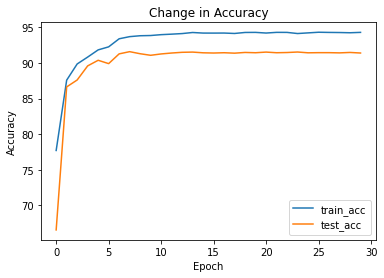

In [13]:
from evascheduler import draw_graph
draw_graph()

In [14]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [15]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


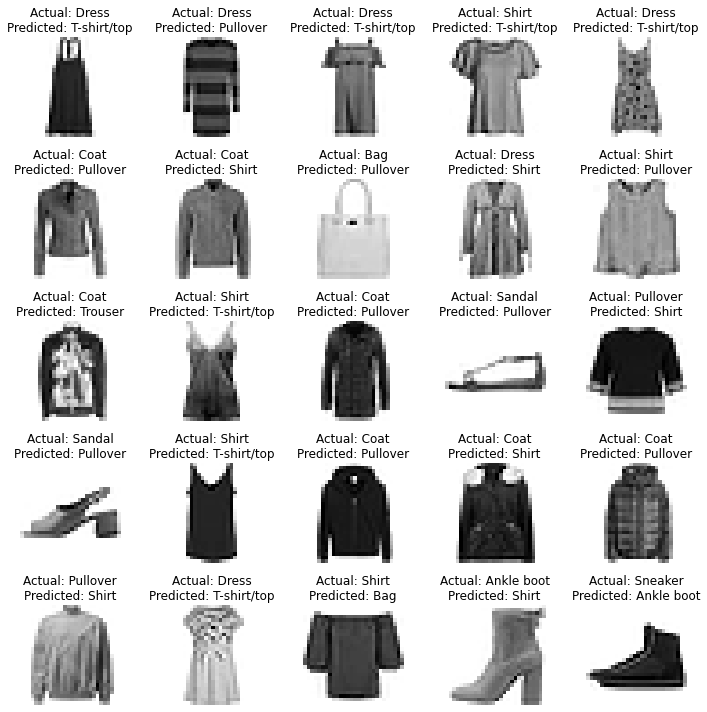

In [16]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")